## <center> **SAS® Viya® Workbench의 Machine Learning Python API** </center>

---
### **1. Linear Models**
---

- **ElasticNet**  : L1 및 L2 정규화가 혼합된 선형 회귀 모델.

- **Lasso**  : L1 정규화를 사용하는 선형 회귀 모델.

- **LinearRegression**  : 최소자승법(Ordinary Least Squares)을 사용하는 선형 회귀 모델.

- **LogisticRegression**  : 로지스틱 회귀 분류기.

- **Ridge**  : L2 정규화를 사용하는 선형 회귀 모델.

---
### **2. Support Vector Models**
---

- **SVC**  : 서포트 벡터 분류(Support Vector Classification) 모델.

- **SVR**  : 서포트 벡터 회귀(Support Vector Regression) 모델.

---
### **3. Tree Models**
---

- **DecisionTreeClassifier** : 의사결정 나무 분류 모델.

- **DecisionTreeRegressor** : 의사결정 나무 회귀 모델.

- **ForestClassifier**  : 랜덤 포레스트 분류 모델.

- **ForestRegressor**  : 랜덤 포레스트 회귀 모델.

- **GradientBoostingClassifier**  : 그래디언트 부스팅 분류 모델.

- **GradientBoostingRegressor**  : 그래디언트 부스팅 회귀 모델.

---
### **#. Case Study**
---

#### **STEP 1: 패키지 설치 및 데이터 로드**

In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
churn_df = pd.read_csv( "/workspaces/workspace/sas-viya-workbench-hands-on/04. Python 핸즈온 코드/churn.csv")

In [3]:
churn_df.head(5)

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


#### **STEP 2: 데이터 전처리 (입력&타겟 분리)**

In [4]:
X_df = churn_df.drop('Churn', axis=1)
y = churn_df['Churn']

#### **STEP 3: 데이터 분할**

데이터셋을 무작위로 **훈련 세트**와 **테스트 세트**로 나눕니다.

- **훈련 세트**: 모델을 학습시키는 데 사용  
- **테스트 세트**: 모델의 성능을 평가하는 데 사용  
- **모델 학습 과정에서는 테스트 세트를 사용하지 않아야 합니다.**

데이터셋을 `train_test_split()`을 사용하여 훈련 세트와 테스트 세트로 나눕니다.  
- **주요 파라미터**
  - `test_size`: 테스트 세트의 크기를 결정  
  - `random_state`: 의사 난수 생성기의 상태를 설정  
  - `stratify`: 타겟 변수의 분포를 훈련 세트와 테스트 세트에서 동일하게 유지  
  
- **결과**
  - `X_train`: 모델 학습에 사용되는 `x`의 일부  
  - `X_test`: 모델 평가에 사용되는 `x`의 일부  
  - `y_train`: 모델 학습에 사용되며 `X_train`에 해당하는 `y`의 일부  
  - `y_test`: 모델 평가에 사용되며 `X_test`에 해당하는 `y`의 일부  

<small> `train_test_split()` 클래스 사용에 대한 자세한 내용은 [문서](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)를 참고하세요.</small>

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_df, y, stratify=y, test_size = 0.2, random_state = 10)

#### **STEP 4: 모형 학습**  
##### **1. 로지스틱 회귀 모형**
(1) 모형 학습

In [6]:
#fit a simple logistic regression model
from sasviya.ml.linear_model import LogisticRegression

logreg = LogisticRegression(solver   = 'lbfgs',
                            tol      = 1e-4,
                            max_iter = 1000)

logreg.fit(X_train, y_train)

LogisticRegression(tol=0.0001, solver="lbfgs", max_iter=1000)

(2) 주요 Hyper Parameters

- **tol**: `float`  
상대적인 기울기 수렴 기준을 지정합니다.

- **fit_intercept**: `bool`  
모델에 편향 항을 포함할지 여부를 지정합니다.

- **max_iter**: `float`  
훈련 반복의 최대 횟수를 지정합니다.

- **max_time**: `float`  
최대 훈련 시간을 초 단위로 지정합니다.

- **solver**: `str`  
사용할 최적화 알고리즘을 지정합니다. 유효한 옵션은 다음과 같습니다:
  - “congra”: 공액 기울기 방법
  - “dbldog”: 더블-도그레그 방법
  - “lbfgs”: 제한된 메모리 BFGS 해결기
  - “newrap”: 라인 탐색 및 리지법을 사용한 뉴턴-랩슨 방법
  - “nmsimp”: 넬더-미드 심플렉스 방법
  - “nrridg”: 리지법을 사용한 뉴턴-랩슨 방법
  - “quanew | duquanew”: 이중 준-뉴턴 최적화

- **selection**: `str`  
사용할 변수 선택 방법을 지정합니다. 유효한 옵션은 다음과 같습니다:
  - “backward”: 후진 선택법
  - “forward”: 전진 선택법
  - “lasso”: Lasso 방법
  - “stepwise”: 단계적 선택법

- **verbose**: `int`  
피팅된 모델에 대해 출력할 정보의 양을 지정합니다. 유효한 옵션은 다음과 같습니다:
  - 0: 출력 없음
  - 1: 반복 이력
  - 2: 반복 이력 및 피팅 통계

<small> `LogisticRegression()` 클래스 사용에 대한 자세한 내용은 [문서](https://go.documentation.sas.com/doc/en/workbenchcdc/v_001/vwbpymlpg/sasviya-ml-linear_model-logisticregression.htm)를 참고하세요.</small> 

##### **2. 서포트 백터 머신 모형**
(1) 모형 학습

In [7]:
#fit a support vector machine classifier
from sasviya.ml.svm import SVC

svm = SVC(C=1.0,
          kernel="rbf")

svm.fit(X_train, y_train)

SVC(kernel="rbf")

(2) 주요 Hyper Parameters

- **max_iter**: `int`  
훈련 반복의 최대 횟수를 지정합니다.

- **C**: `float`  
비용 정규화 파라미터를 지정합니다.

- **kernel**: `{“linear”, “poly”, “polynomial”, “rbf”, “sigmoid”}`  
사용할 커널의 유형을 지정합니다.

- **degree**: `int`  
다항식 커널의 차수를 지정합니다. 커널이 “polynomial”이 아닌 경우는 무시됩니다.

- **sigma**: `“auto”`, `“scale”` 또는 `float`  
RBF 및 Sigmoid 커널의 커널 파라미터를 지정합니다.

- **coef0**: `float`  
Sigmoid 커널의 두 번째 파라미터를 지정합니다.

- **method**: `{“activeset”, “cd”, “ipoint”}` 또는 `None`  
모델을 피팅할 때 사용하는 최적화 방법을 지정합니다.
  - **Active-Set**: 모든 커널에서 사용 가능하며, RBF 및 Sigmoid 커널과 3차 이상의 다항식 커널의 기본값입니다.
  - **Interior Point**: 선형 커널 및 다항식 커널에서 사용 가능하며, 선형 커널과 3차 이하의 다항식 커널의 기본값입니다.
  - **Coordinate Descent**: 선형 커널에서만 사용 가능합니다.

- **tol**: `float`  
조기 중지를 위한 허용 오차 임계값을 지정합니다.

- **random_state**: `int`  
난수 생성에 사용할 시드를 지정합니다.

- **scale**: `bool`  
True로 설정하면 훈련 전에 숫자 변수를 스케일링합니다.

- **verbose**: `int`  
피팅된 모델에 대해 출력할 정보의 양을 지정합니다.

<small> `SVC()` 클래스 사용에 대한 자세한 내용은 [문서](https://go.documentation.sas.com/doc/en/workbenchcdc/v_001/vwbpymlpg/sasviya-ml-svm-svc.htm)를 참고하세요.</small> 

##### **3. 의사결정 트리 모형**
(1) 모형 학습

In [8]:
#fit a decision tree model
from sasviya.ml.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion = "chisquare",
                               max_depth = 10,
                               ccp_alpha = 0)

dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion="chisquare")

(2) 주요 Hyper Parameters

- **criterion**: `{“chaid”, “chisquare”, “entropy|gain”, “igr|gainratio”, “gini”}`  
  각 트리 노드의 분할 기준을 지정합니다.

- **max_depth**: `int`  
  트리의 최대 깊이를 지정합니다.

- **min_samples_leaf**: `int`  
  각 노드에 최소한으로 있어야 하는 샘플의 수를 지정합니다.

- **ccp_alpha**: `float`  
  회귀 트리의 최소 비용 복잡성 가지치기에 사용할 값을 지정합니다.

- **verbose**: `int`  
  피팅된 모델에 대해 출력할 정보의 양을 지정합니다.

<small> `DecisionTreeClassifier()` 클래스 사용에 대한 자세한 내용은 [문서](https://go.documentation.sas.com/doc/en/workbenchcdc/v_001/vwbpymlpg/sasviya-ml-tree-decisiontreeclassifier.htm)를 참고하세요.</small> 

##### **4. 랜덤 포레스트 모형**
(1) 모형 학습

In [9]:
#fit a random forest model
from sasviya.ml.tree import ForestClassifier

forest = ForestClassifier(criterion        = "chisquare",
                          n_estimators     = 100,
                          max_depth        = 7,
                          min_samples_leaf = 5,
                          bootstrap        = 0.6,
                          random_state     = 919)

forest.fit(X_train, y_train)

ForestClassifier(criterion="chisquare", max_depth=7, random_state=919)

(2) 주요 Hyper Parameters

- **n_estimators**: `int`  
  생성할 트리의 수를 지정합니다.

- **bootstrap**: `float`  
  부트스트랩 샘플에 사용할 데이터의 비율을 지정합니다.

- **criterion**: `{“chaid”, “chisquare”, “entropy|gain”, “igr|gainratio”, “gini”}`  
  각 트리 노드에서 분할의 품질을 측정하는 기준을 지정합니다.

- **max_depth**: `int`  
  트리의 최대 깊이를 지정합니다.

- **max_features**: `int`  
  노드를 분할할 때 고려할 입력 변수의 수를 지정합니다(모델 출력에서 “M”으로 표시). 각 트리마다 입력 변수들 중에서 무작위로 선택된 변수들로 분할을 진행합니다. 기본값은 입력 변수 수의 제곱근입니다.

- **min_samples_leaf**: `int`  
  각 노드에 최소한으로 있어야 하는 샘플의 수를 지정합니다.

- **n_bins**: `int`  
  숫자형 변수에 대해 사용할 빈의 수를 지정합니다.

- **oob_score**: `bool`  
  모델 훈련 시 OOB(Out-of-Bag) 오류를 계산할지 여부를 지정합니다.

- **random_state**: `int`  
  난수 생성에 사용할 시드를 지정합니다.

- **verbose**: `int`  
  피팅된 모델에 대해 출력할 정보의 양을 지정합니다.


<small> `ForestClassifier()` 클래스 사용에 대한 자세한 내용은 [문서](https://go.documentation.sas.com/doc/en/workbenchcdc/v_001/vwbpymlpg/sasviya-ml-tree-forestclassifier.htm)를 참고하세요.</small> 

##### **5. 그래디언트 부스팅 모형**
(1) 모형 학습

In [10]:
#fit a tree-based gradient boosting
from sasviya.ml.tree import GradientBoostingClassifier

gradboost = GradientBoostingClassifier(n_estimators     = 100,
                                       max_depth        = 4,
                                       min_samples_leaf = 5,
                                       learning_rate    = 0.1,
                                       subsample        = 0.8,
                                       random_state     = 919)

gradboost.fit(X_train, y_train)

GradientBoostingClassifier(subsample=0.8, random_state=919)

(2) 주요 Hyper Parameters

- **n_bins**: `int`  
  숫자형 변수에 대해 사용할 빈의 수를 지정합니다. 기본값은 50입니다.

- **min_samples_leaf**: `int`  
  각 노드에 최소한으로 있어야 하는 샘플의 수를 지정합니다. 기본값은 5입니다.

- **n_estimators**: `int`  
  생성할 트리의 수를 지정합니다. 기본값은 100입니다.

- **max_depth**: `int`  
  트리의 최대 깊이를 지정합니다. 기본값은 4입니다.

- **max_features**: `float`  
  노드를 분할할 때 고려할 입력 변수의 수를 지정합니다. 기본값은 입력 변수 수에 설정됩니다.

- **learning_rate**: `float`  
  각 트리의 학습률을 지정합니다. 기본값은 0.1입니다.

- **subsample**: `float`  
  각 트리를 구축하는 데 사용할 데이터의 비율을 지정합니다. 기본값은 0.5입니다.

- **l1_penalty**: `float`  
  예측에 대한 L1 정규화 값을 지정합니다. 기본값은 0입니다.

- **l2_penalty**: `float`  
  예측에 대한 L2 정규화 값을 지정합니다. 기본값은 1입니다.

- **random_state**: `float`  
  난수 생성기의 시드를 지정합니다. 기본값은 컴퓨터 시계를 기반으로 한 난수 스트림입니다. 재현 가능한 난수 시퀀스를 원할 경우 0보다 큰 값을 지정합니다.

- **verbose**: `int`  
  피팅된 모델에 대해 출력할 정보의 양을 지정합니다.

- **calc_feature_importances**: `bool`  
  특성 중요도를 계산할지 여부를 지정합니다.

- **validation_fraction**: `float`  
  훈련 샘플에서 검증에 사용할 비율을 지정합니다. 검증 비율이 0보다 크면 조기 중지 모드가 활성화됩니다.

- **n_iter_no_change**: `int`  
  조기 중지를 위한 최대 훈련 반복 횟수를 지정합니다. 검증 비율이 지정되지 않으면 무시됩니다.

- **tol**: `float`  
  이전 반복에 대한 상대적인 변화로 조기 중지를 위한 허용 오차 값을 지정합니다. 검증 비율이 지정되지 않으면 무시됩니다.

<small> `GradientBoostingClassifier()` 클래스 사용에 대한 자세한 내용은 [문서](https://go.documentation.sas.com/doc/en/workbenchcdc/v_001/vwbpymlpg/sasviya-ml-tree-gradientboostingclassifier.htm)를 참고하세요.</small> 

#### **STEP 5: 모형 평가**  
##### **1. 평가 지표 산출**

In [26]:
# 필요한 라이브러리 가져오기
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, auc
from sklearn.preprocessing import label_binarize

# 모델 리스트 및 이름 정의
models = [
    ("Logistic Regression", logreg),
    ("Support Vector Machine", svm),
    ("Decision Tree", dtree),
    ("Random Forest", forest),
    ("Gradient Boosting", gradboost)
]

# 결과 저장용 리스트
metrics = []
roc_curves = []

# 이진 분류를 위한 타겟 변환 (필요 시)
if len(np.unique(y_test)) > 2:
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))[:, 0]
else:
    y_test_bin = y_test

for name, model in models:
    y_pred = model.predict(X_test)  # 예측값

    # predict_proba 결과 확인 및 처리
    if hasattr(model, "predict_proba"):
        proba = model.predict_proba(X_test)
        
        # Pandas DataFrame으로 반환된 경우 처리
        if isinstance(proba, pd.DataFrame):
            proba = proba.values  # NumPy 배열로 변환
        
        if proba.ndim == 2 and proba.shape[1] > 1:
            y_pred_proba = proba[:, 1]  # 두 번째 클래스의 확률
        else:
            y_pred_proba = proba.ravel()  # 단일 클래스 확률
    else:
        y_pred_proba = None

    # 평가지표 계산
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="binary")
    recall = recall_score(y_test, y_pred, average="binary")
    f1 = f1_score(y_test, y_pred, average="binary")
    
    # ROC-AUC 계산
    if y_pred_proba is not None:
        fpr, tpr, _ = roc_curve(y_test_bin, y_pred_proba)
        auc_score = auc(fpr, tpr)
        roc_curves.append((name, fpr, tpr, auc_score))
    else:
        roc_curves.append((name, None, None, None))

    # 결과 저장
    metrics.append({
        "Model": name,
        "Accuracy": round(accuracy, 3),
        "Precision": round(precision, 3),
        "Recall": round(recall, 3),
        "F1 Score": round(f1, 3),
        "AUC": round(auc_score, 3) if y_pred_proba is not None else None
    })

##### **2. 평가 지표 결과**

In [27]:
metrics_df = pd.DataFrame(metrics)
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Logistic Regression,0.897,0.827,0.434,0.570,0.954
1,Support Vector Machine,0.898,0.872,0.414,0.562,0.939
2,Decision Tree,0.927,0.785,0.737,0.760,0.963
3,Random Forest,0.941,0.860,0.747,0.800,0.980
4,Gradient Boosting,0.952,0.856,0.838,0.847,0.988


##### **3. ROC-Curve**

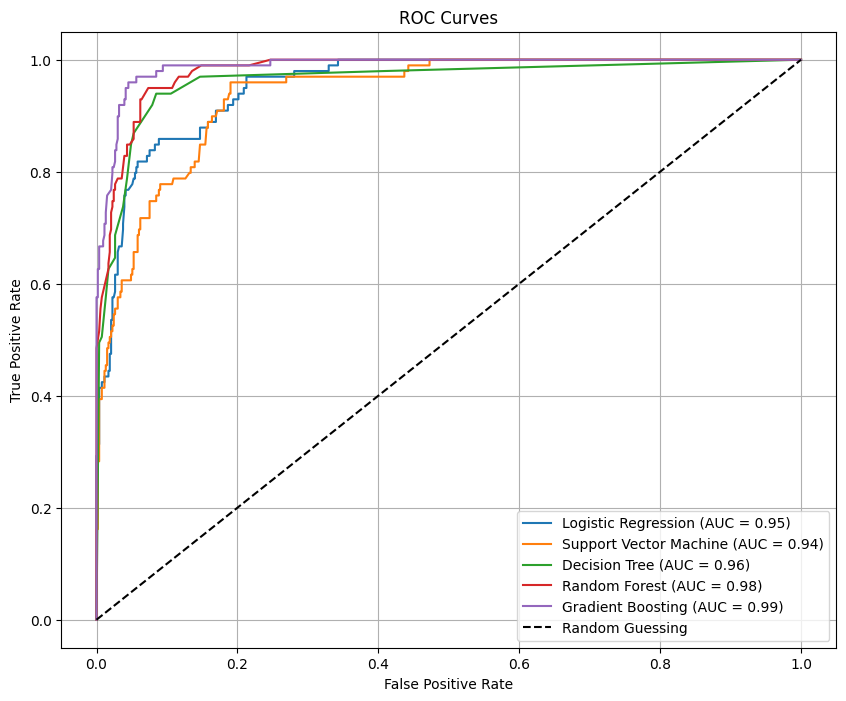

In [28]:
plt.figure(figsize=(10, 8))
for name, fpr, tpr, auc_score in roc_curves:
    if fpr is not None and tpr is not None:
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.grid()
plt.show()